Which genres are most popular from year to year?,
What kinds of properties are associated with movies that have high revenues?


In [1]:
import random as rand
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.drop_duplicates(inplace=True)
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<font size="5">
Q1 What are the most popular genre on a each year ?.
</font>


In [2]:
df_gen = df[df.genres.notna()]
df_gen.reset_index(drop=True, inplace=True)

In [3]:
## Splitting Each Movie Associated with multiple Genres into multiple rows in the dataframe
adds = []
rems = []
for x in range(df_gen['genres'].size):
    if ("|" in df_gen['genres'][x]):
        genlst = df_gen['genres'][x].split("|")
        rems.append(x)
        row = df_gen.iloc[x, :].copy()
        for gen in genlst:
            tmp = row.copy()
            tmp['genres'] = gen
            adds.append(tmp.values)

df_gen.drop(rems, inplace=True)
adds = pd.DataFrame(adds, columns = df.columns)
df_gen = df_gen.append(adds)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
rel = df_gen.groupby(['release_year', 'genres']).median()['popularity'].unstack()
rel.fillna(0, inplace = True)
rel.max(axis=1)
popyear = rel.idxmax(axis=1)
mostpop = pd.DataFrame(popyear.values, index = popyear.index)
mostpop

,0
release_year,
1960,Romance
1961,Animation
1962,Adventure
1963,Animation
1964,Family
1965,Music
1966,Fantasy
1967,Animation
1968,Mystery


Text(0.5, 1.0, '%dominance of popularity of each genre in the years 1960-2015')

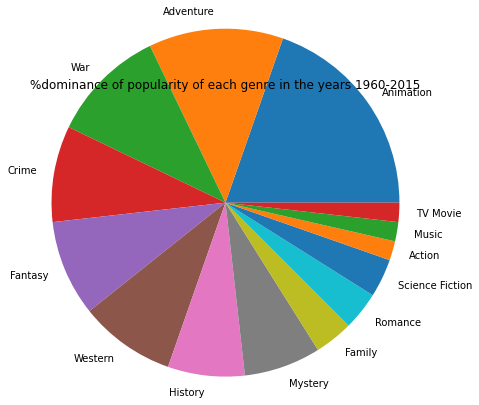

In [5]:

lbls = [x[0] for x in mostpop.value_counts().index.values]
plt.pie(mostpop.value_counts(), labels = lbls, radius=2);
plt.title('%dominance of popularity of each genre in the years 1960-2015')

<font size="5">Q2 What is the trend of popularity for each genre over the years ?</font>

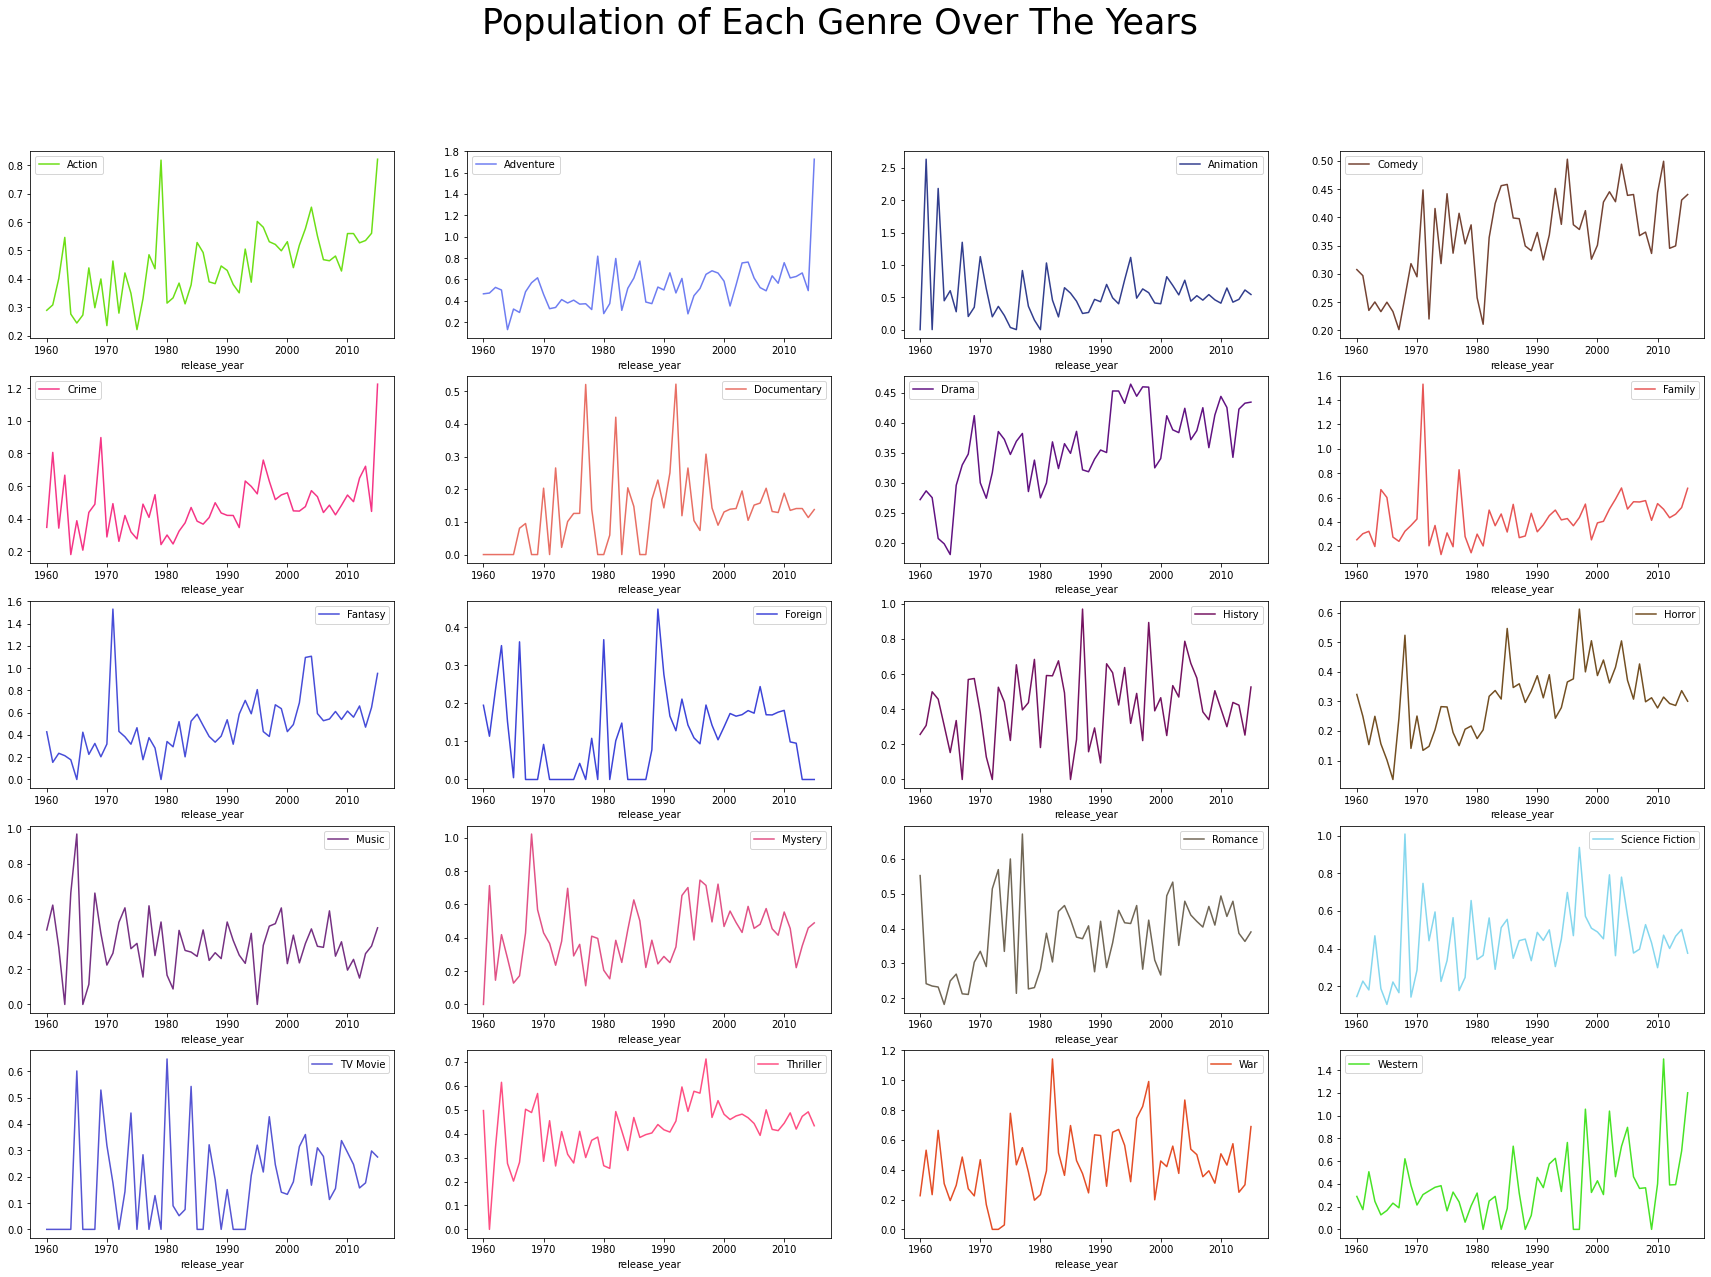

In [15]:
fig, ax = plt.subplots(5,4,figsize = (30,20))
fig.suptitle('Population of Each Genre Over The Years',fontsize = 35)
c = 0
for x in range(5):
    for y in range(4):
        rel.iloc[:,c].plot(legend=True, ax=ax[x][y], color = "#"+''.join(rand.choice('12345678DEF') for j in range(6)));
        c = c + 1


<font size="4"> Q3 How the Number of Movies Produced Changed Over The Years</font>

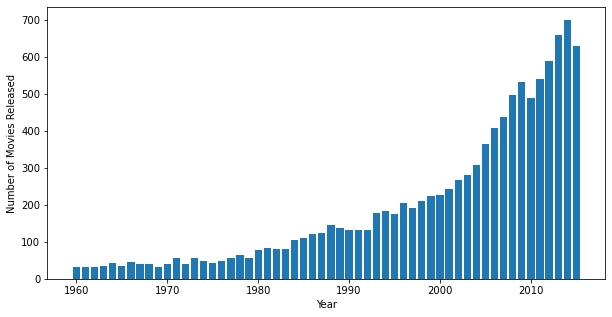

In [50]:
nper = df.groupby('release_year').count()['id']
plt.subplots(figsize=(10,5))
plt.bar(height = nper.values,x = nper.index);
plt.xlabel('Year');
plt.ylabel('Number of Movies Released');

<font size="4"> Q4 What kinds of properties are associated with movies that have high revenues?</font>

In [60]:
df.revenue.isna().sum() ## = 0
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [92]:
## Investigating The Top 25% Movies in Revenue
tope = df.revenue_adj.describe()[-2]
df_highRev = df.query('revenue_adj >= @tope')
df_highRev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2717 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2717 non-null   int64  
 1   imdb_id               2717 non-null   object 
 2   popularity            2717 non-null   float64
 3   budget                2717 non-null   int64  
 4   revenue               2717 non-null   int64  
 5   original_title        2717 non-null   object 
 6   cast                  2717 non-null   object 
 7   homepage              993 non-null    object 
 8   director              2717 non-null   object 
 9   tagline               2617 non-null   object 
 10  keywords              2667 non-null   object 
 11  overview              2717 non-null   object 
 12  runtime               2717 non-null   int64  
 13  genres                2717 non-null   object 
 14  production_companies  2712 non-null   object 
 15  release_date        

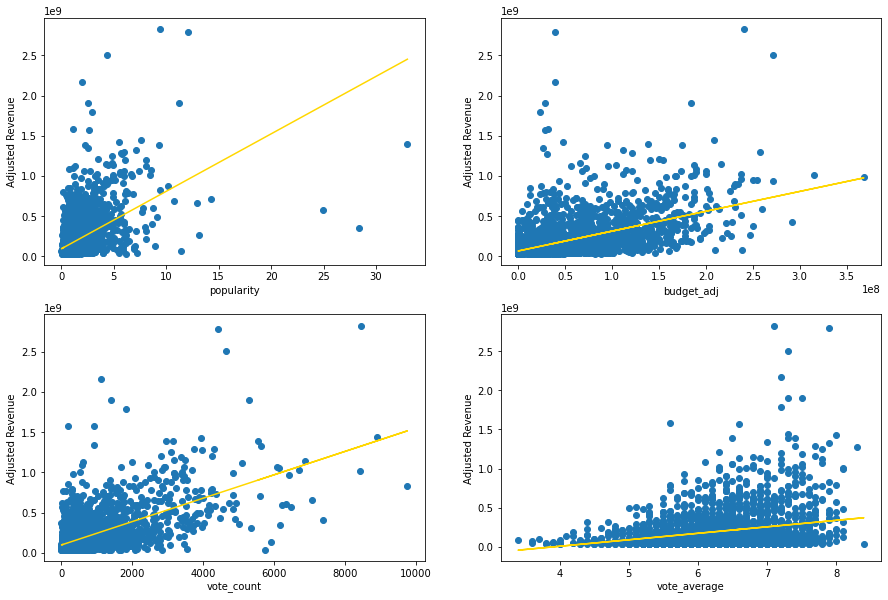

In [134]:
f,grd = plt.subplots(2,2,figsize=(15,10))
xInterest = ['popularity', 'budget_adj', 'vote_count', 'vote_average']
xi = 0
for i in range(2):
    for j in range(2):
        grd[i][j].scatter(df_highRev[xInterest[xi]], df_highRev.revenue_adj)
        grd[i][j].set_xlabel(xInterest[xi])
        grd[i][j].set_ylabel('Adjusted Revenue')
        
        ##creating regression line
        m, b = np.polyfit(df_highRev[xInterest[xi]], df_highRev.revenue_adj,1)
        grd[i][j].plot(df_highRev[xInterest[xi]], df_highRev[xInterest[xi]]*m+b, color='gold')
        xi += 1

In [102]:
df_highRev.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
xInterest = ['popularity', 'budget_adj', 'vote_count', 'vote_average']